<a href="https://colab.research.google.com/github/e19166/e19-4yp-Dynamic-Multi-Dimensional-Resource-Orchestration-in-Kubernetes/blob/main/results/service1_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('service-1-deployment_dataset.csv')
df.head()  # to preview the data


,Timestamp,Service,CPU Request,Memory Request,CPU Limit,Memory Limit,Latency,CPU Usage,Memory Usage
0,2025-05-06T17:04:04.406000,service-1-deployment,0.1,134217728,0.2,268435456,0.004183,0.186712,178962432
1,2025-05-06T17:04:34.483000,service-1-deployment,0.1,134217728,0.2,268435456,0.004181,0.186702,178962432
2,2025-05-06T17:05:04.564000,service-1-deployment,0.1,134217728,0.2,268435456,0.004181,0.186709,179482624
3,2025-05-06T17:05:34.648000,service-1-deployment,0.1,134217728,0.2,268435456,0.004185,0.186709,179482624
4,2025-05-06T17:06:04.726000,service-1-deployment,0.1,134217728,0.2,268435456,0.004185,0.186698,178966528


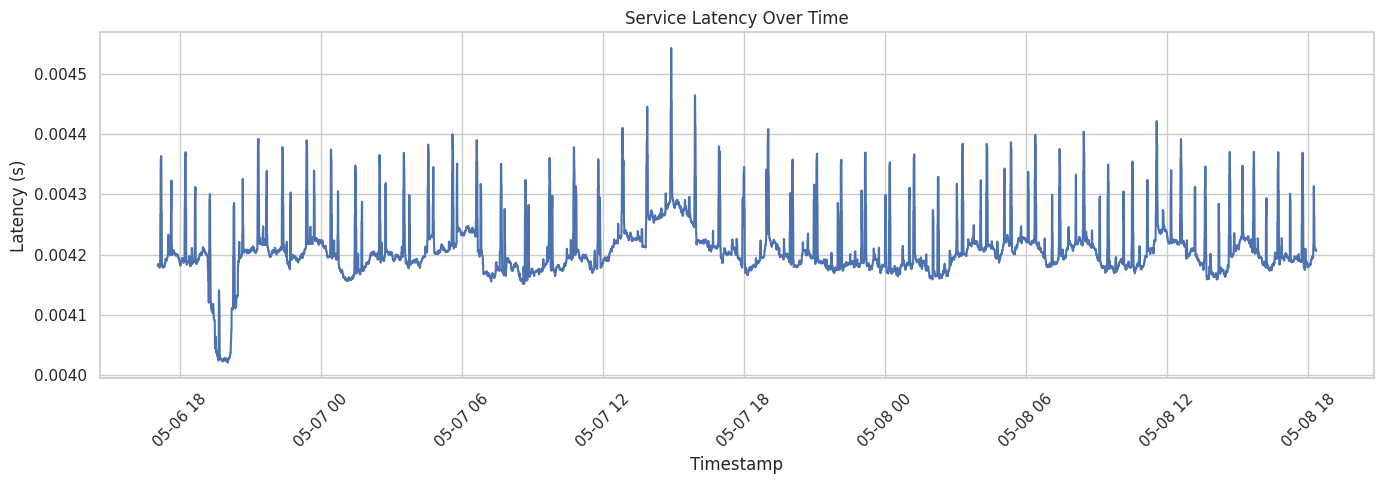

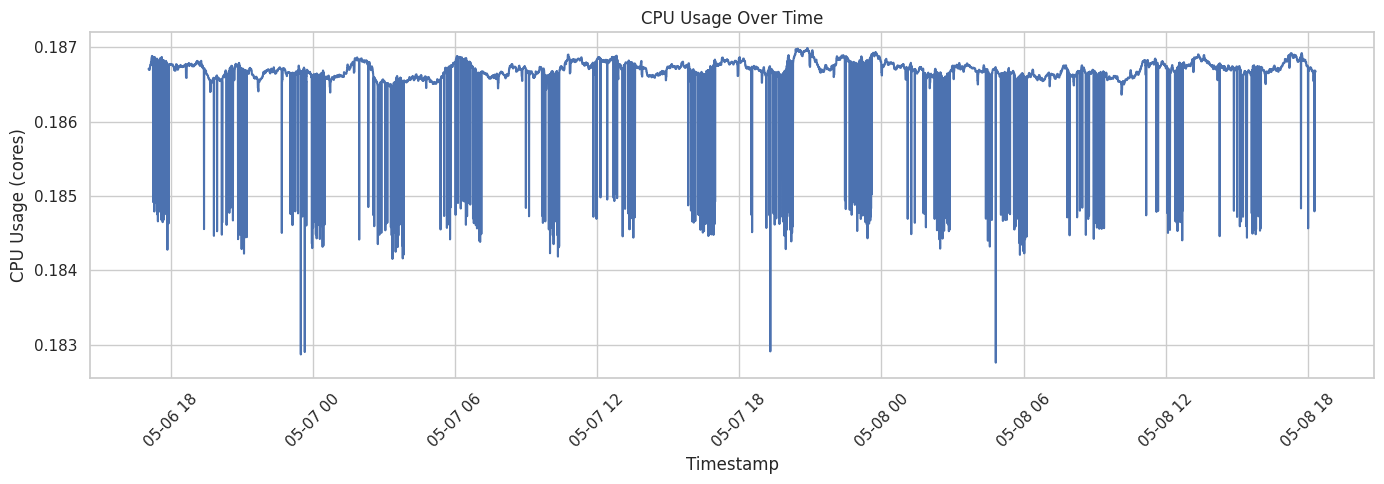

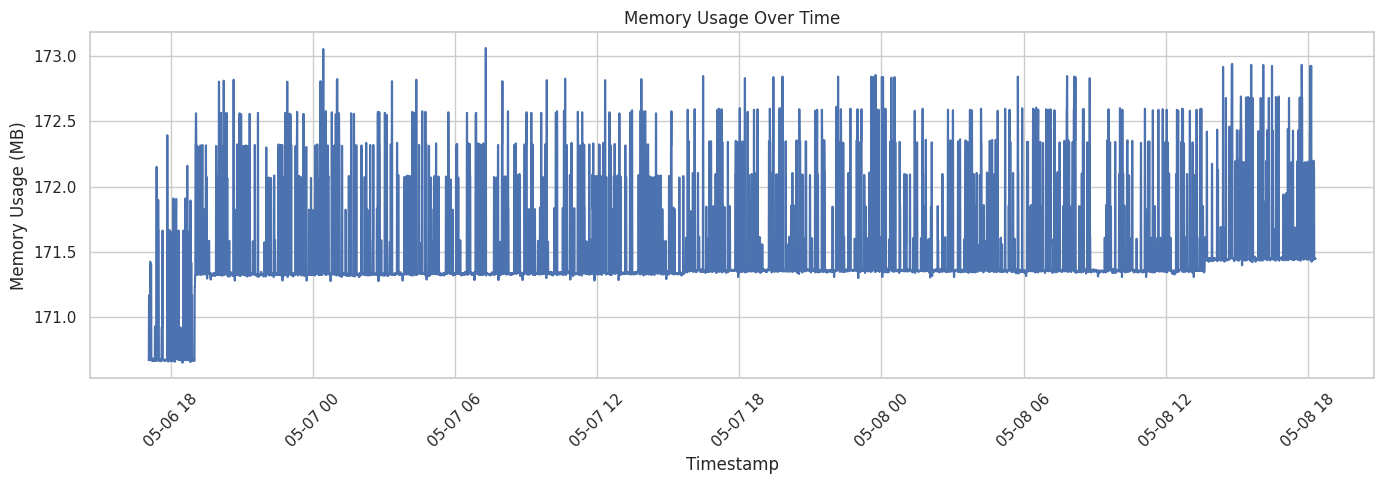

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='mixed')


# Set visual style
sns.set(style="whitegrid")

# Plotting functions
def plot_time_series(x, y, ylabel, title):
  plt.figure(figsize=(14, 5))
  sns.lineplot(x=x, y=y)
  plt.ylabel(ylabel)
  plt.xlabel("Timestamp")
  plt.title(title)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

# 1. Latency over time
plot_time_series(df['Timestamp'], df['Latency'], 'Latency (s)', 'Service Latency Over Time')

# 2. CPU Usage over time
plot_time_series(df['Timestamp'], df['CPU Usage'], 'CPU Usage (cores)', 'CPU Usage Over Time')

# 3. Memory Usage over time
plot_time_series(df['Timestamp'], df['Memory Usage'] / (1024 ** 2), 'Memory Usage (MB)', 'Memory Usage Over Time')



<ipython-input-19-b30dbe2c1d19>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  memory_latency_avg = df.groupby('Memory_Bin')['Latency'].mean().reset_index()


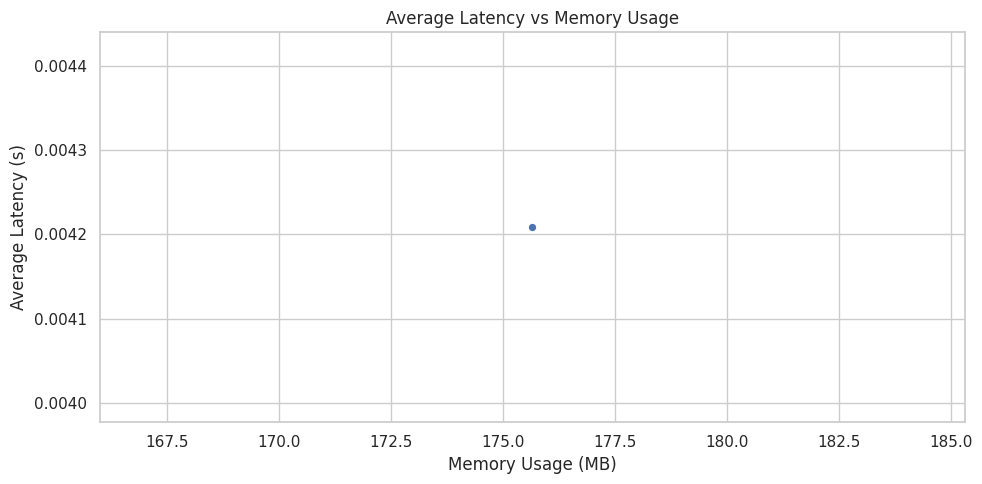

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert memory to MB
df['Memory_MB'] = df['Memory Usage'] / (1024 ** 2)

# Bin memory usage in 10 MB intervals
bins = np.arange(df['Memory_MB'].min(), df['Memory_MB'].max() + 10, 10)
df['Memory_Bin'] = pd.cut(df['Memory_MB'], bins)

# Group by memory bin and calculate average latency
memory_latency_avg = df.groupby('Memory_Bin')['Latency'].mean().reset_index()

# Drop bins with NaN latency (no data)
memory_latency_avg = memory_latency_avg.dropna()

# Use bin midpoints for plotting
memory_latency_avg['Memory_Mid'] = memory_latency_avg['Memory_Bin'].apply(lambda x: x.mid)

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x='Memory_Mid', y='Latency', data=memory_latency_avg, marker='o')
plt.xlabel('Memory Usage (MB)')
plt.ylabel('Average Latency (s)')
plt.title('Average Latency vs Memory Usage')
plt.grid(True)
plt.tight_layout()
plt.show()


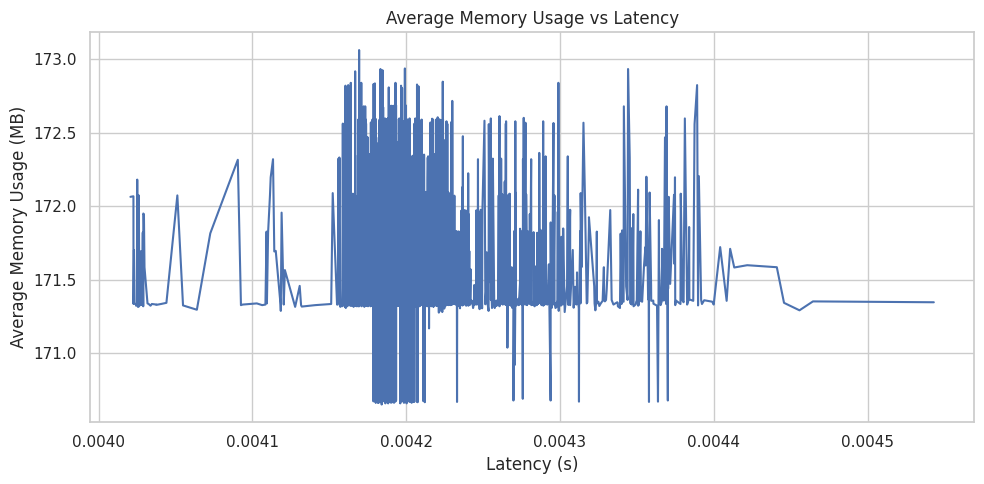

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert memory to MB
df['Memory_MB'] = df['Memory Usage'] / (1024 ** 2)

# Group by Latency and compute average Memory Usage
latency_memory_avg = df.groupby('Latency')['Memory_MB'].mean().reset_index()

# Sort by latency (for a smooth line)
latency_memory_avg = latency_memory_avg.sort_values(by='Latency')

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x='Latency', y='Memory_MB', data=latency_memory_avg)
plt.xlabel('Latency (s)')
plt.ylabel('Average Memory Usage (MB)')
plt.title('Average Memory Usage vs Latency')
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-21-df37331adec6>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cpu_latency_avg = df.groupby('CPU_Bin')['Latency'].mean().reset_index()


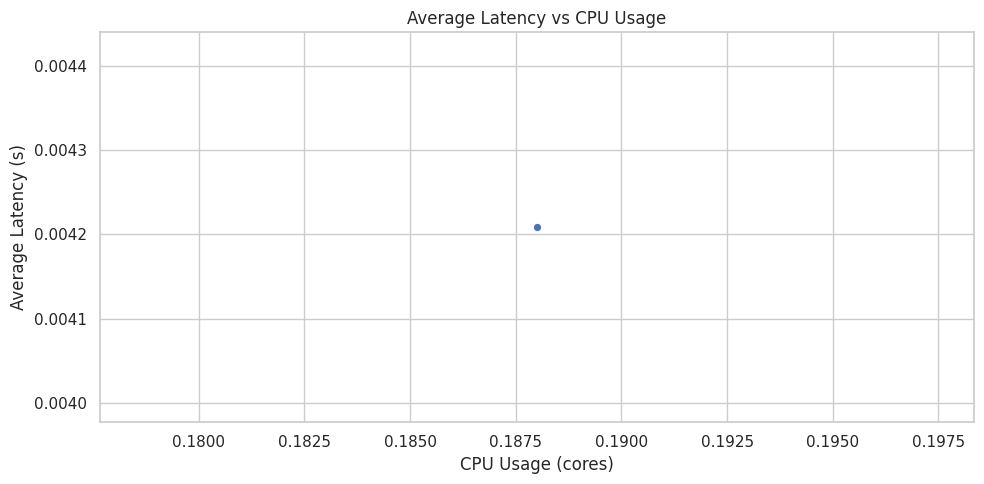

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Bin CPU usage (e.g., in 0.01 core intervals)
bins = np.arange(df['CPU Usage'].min(), df['CPU Usage'].max() + 0.01, 0.01)
df['CPU_Bin'] = pd.cut(df['CPU Usage'], bins)

# Group by CPU bin and calculate average latency
cpu_latency_avg = df.groupby('CPU_Bin')['Latency'].mean().reset_index()

# Drop bins with NaN latency (no data)
cpu_latency_avg = cpu_latency_avg.dropna()

# Use bin midpoints for plotting
cpu_latency_avg['CPU_Mid'] = cpu_latency_avg['CPU_Bin'].apply(lambda x: x.mid)

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x='CPU_Mid', y='Latency', data=cpu_latency_avg, marker='o')
plt.xlabel('CPU Usage (cores)')
plt.ylabel('Average Latency (s)')
plt.title('Average Latency vs CPU Usage')
plt.grid(True)
plt.tight_layout()
plt.show()


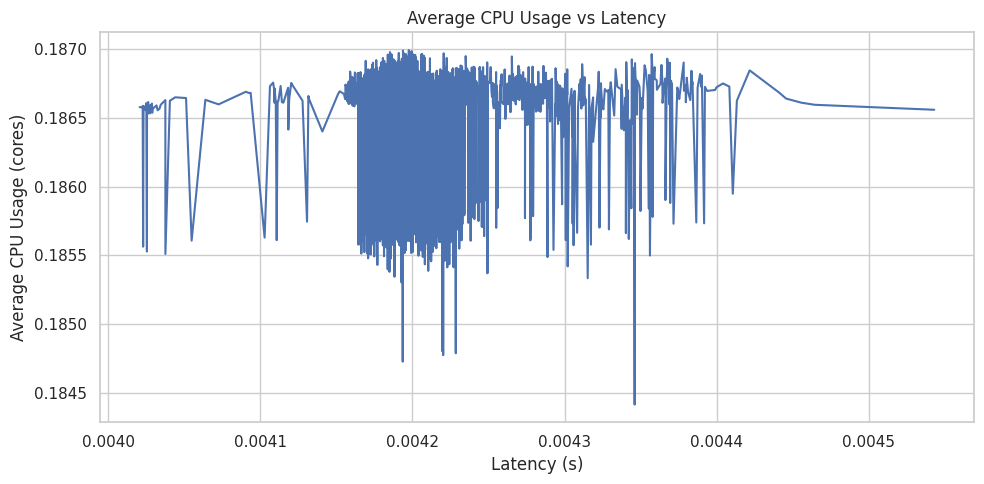

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Latency and compute average CPU Usage
latency_cpu_avg = df.groupby('Latency')['CPU Usage'].mean().reset_index()

# Sort by latency for a smooth line
latency_cpu_avg = latency_cpu_avg.sort_values(by='Latency')

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x='Latency', y='CPU Usage', data=latency_cpu_avg)
plt.xlabel('Latency (s)')
plt.ylabel('Average CPU Usage (cores)')
plt.title('Average CPU Usage vs Latency')
plt.grid(True)
plt.tight_layout()
plt.show()


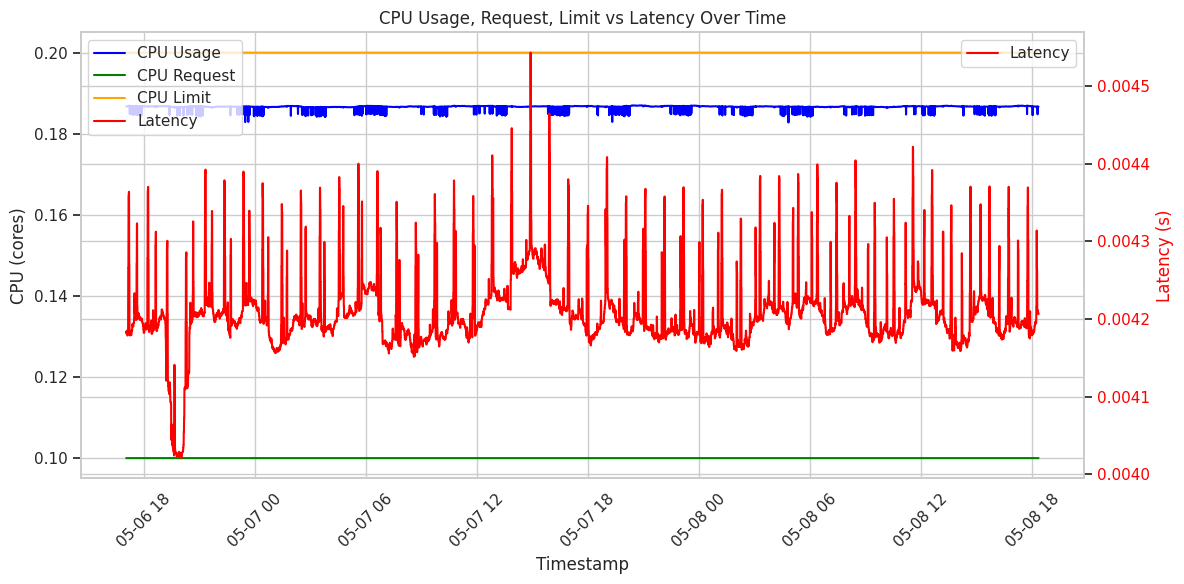

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the main plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot CPU-related metrics on the left y-axis
sns.lineplot(ax=ax1, data=df, x='Timestamp', y='CPU Usage', label='CPU Usage', color='blue')
sns.lineplot(ax=ax1, data=df, x='Timestamp', y='CPU Request', label='CPU Request', color='green')
sns.lineplot(ax=ax1, data=df, x='Timestamp', y='CPU Limit', label='CPU Limit', color='orange')

ax1.set_ylabel('CPU (cores)')
ax1.set_xlabel('Timestamp')
ax1.tick_params(axis='x', rotation=45)

# Create the right y-axis for Latency
ax2 = ax1.twinx()
sns.lineplot(ax=ax2, data=df, x='Timestamp', y='Latency', label='Latency', color='red')
ax2.set_ylabel('Latency (s)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and legends
plt.title('CPU Usage, Request, Limit vs Latency Over Time')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.tight_layout()
plt.show()


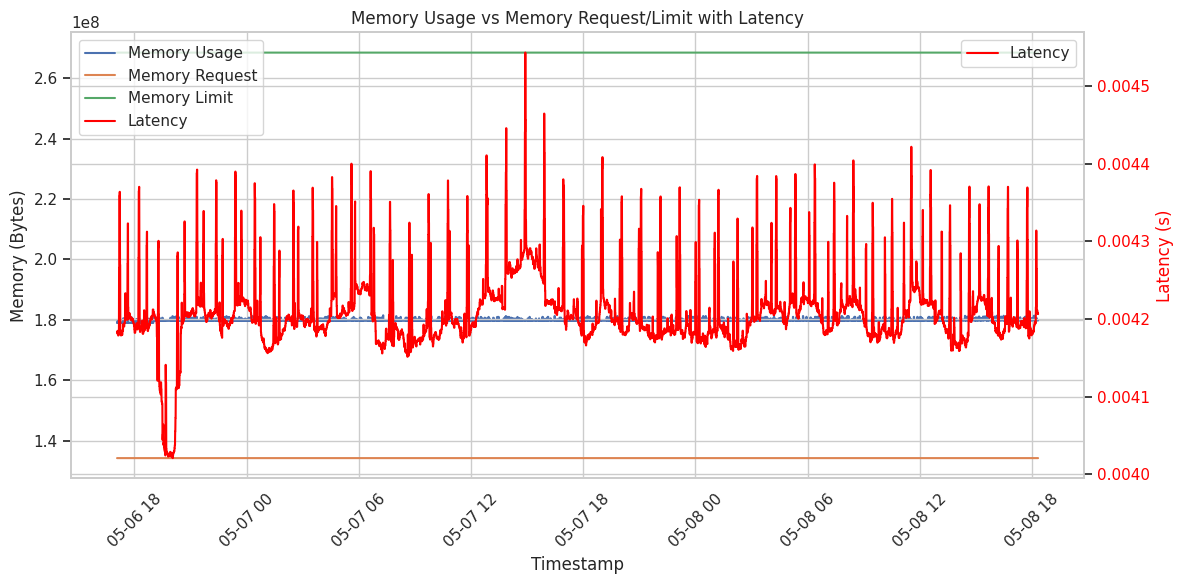

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure and first axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot memory usage, request, and limit on left y-axis
sns.lineplot(data=df, x='Timestamp', y='Memory Usage', ax=ax1, label='Memory Usage')
sns.lineplot(data=df, x='Timestamp', y='Memory Request', ax=ax1, label='Memory Request')
sns.lineplot(data=df, x='Timestamp', y='Memory Limit', ax=ax1, label='Memory Limit')

# Labels and formatting for ax1
ax1.set_ylabel('Memory (Bytes)')
ax1.set_xlabel('Timestamp')
ax1.tick_params(axis='x', rotation=45)
ax1.set_title('Memory Usage vs Memory Request/Limit with Latency')

# Create second y-axis for latency
ax2 = ax1.twinx()
sns.lineplot(data=df, x='Timestamp', y='Latency', ax=ax2, color='red', label='Latency')

# Label for right y-axis
ax2.set_ylabel('Latency (s)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.tight_layout()
plt.show()
